In [41]:
'''
Classification - Adult data set from https://archive.ics.uci.edu/ml/datasets/Adult
Last Updated : 03/31/2019, by Hyungmin Jun (hyungminjun@outlook.com)

=============================================================================

Classification using Keras
Copyright 2019 Hyungmin Jun. All rights reserved.

License - GPL version 3
This program is free software: you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation, either version 3 of the License, or any later version. This
program is distributed in the hope that it will be useful, but WITHOUT ANY
WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program. If not, see <http://www.gnu.org/licenses/>.
'''

'\nClassification - Adult data set from https://archive.ics.uci.edu/ml/datasets/Adult\nLast Updated : 03/31/2019, by Hyungmin Jun (hyungminjun@outlook.com)\n\n=============================================================================\n\nClassification using Keras\nCopyright 2019 Hyungmin Jun. All rights reserved.\n\nLicense - GPL version 3\nThis program is free software: you can redistribute it and/or modify it under\nthe terms of the GNU General Public License as published by the Free Software\nFoundation, either version 3 of the License, or any later version. This\nprogram is distributed in the hope that it will be useful, but WITHOUT ANY\nWARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR\nA PARTICULAR PURPOSE. See the GNU General Public License for more details.\nYou should have received a copy of the GNU General Public License along with\nthis program. If not, see <http://www.gnu.org/licenses/>.\n'

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

%matplotlib inline

In [43]:
'''
Attribute Information:

Listing of attributes: 

>50K, <=50K. 

age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'''

renames = ['age', 'wc', 'fn', 'edu', 'edu-num', 'married', 'job', 'relation', 'race', 'sex', 'cap_gain', 'cap_loss', 'H/W', 'country', '50k']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', index_col=False, names = renames)
#df.count()
#df.head(10)
df.describe()

,age,fn,edu-num,cap_gain,cap_loss,H/W
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


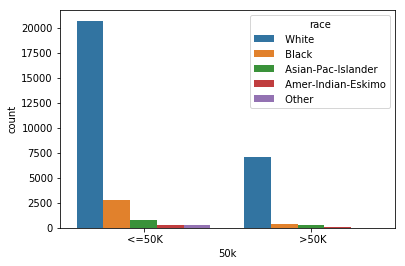

In [44]:
#sns.countplot('sex', data=df)
#sns.countplot('50k', data=df)
sns.countplot('50k', hue='race', data=df)

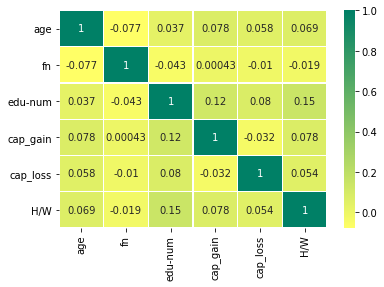

In [45]:
sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidth=0.2)

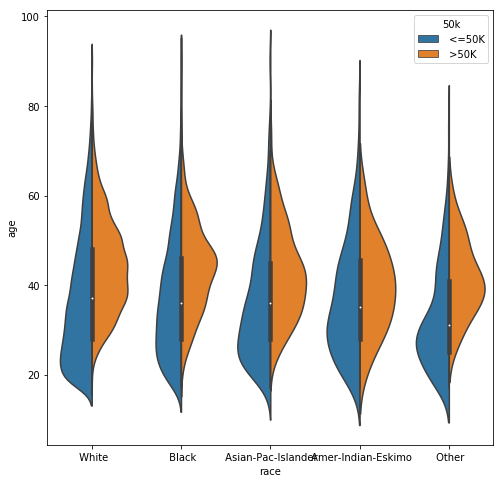

In [46]:
plt.figure(figsize=(8,8))
sns.violinplot('race', 'age', hue='50k', data=df, split=True)

In [47]:
# Set y data
y = df['50k'].values.tolist()
y = LabelEncoder().fit_transform(df['50k'])
y = to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [48]:
# set x data
x = df.drop(['age', 'fn', 'edu-num', 'cap_gain', 'cap_loss', 'H/W', '50k' ], axis=1)
x = pd.get_dummies(x, drop_first=True)
x = pd.concat([x, df[['age', 'fn', 'edu-num', 'cap_gain', 'cap_loss', 'H/W']]], axis=1)
x.head()

,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay,edu_ 11th,edu_ 12th,...,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,age,fn,edu-num,cap_gain,cap_loss,H/W
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [54]:
# Scale x data
scaler = MinMaxScaler()
x[['age', 'fn', 'edu-num', 'cap_gain', 'cap_loss', 'H/W']] = scaler.fit_transform(x[['age', 'fn', 'edu-num', 'cap_gain', 'cap_loss', 'H/W']])
x.head()

,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay,edu_ 11th,edu_ 12th,...,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,age,fn,edu-num,cap_gain,cap_loss,H/W
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [68]:
x_train = x[:-1000]
x_test  = x[-1000:]

y_train = y[:-1000]
y_test  = y[-1000:]

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512,  activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(2,    activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              103424    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 258       
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________
Train on 25248 samples, validate on 6313 samples
Epoch 1/5
25248/25248 [==============================] - 9s 350us/step - loss: 0.3559 - acc: 0.8348 - val_loss: 0.3396 - val_acc: 0.8454
Epoch 2/5
25248/25248 [==============================] - 7s 280us/step - loss: 0.3

Text(0.5, 1.0, 'accuracy')

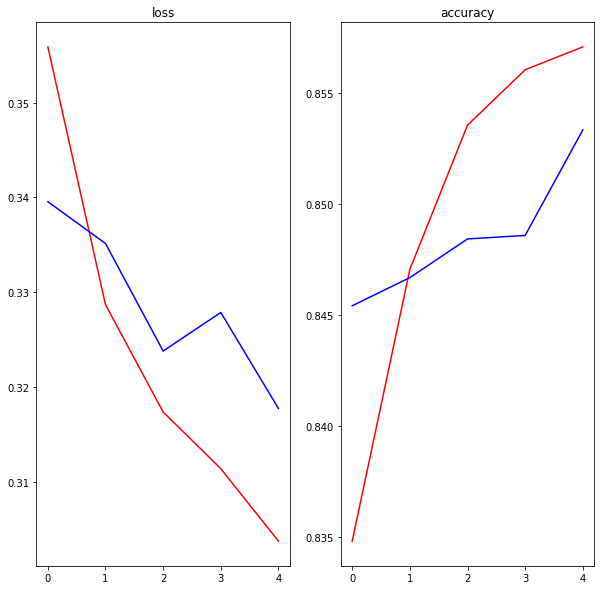

In [69]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('accuracy')

In [73]:
score = model.evaluate(x_test, y_test)
print(score)

pred = model.predict(x_test)
print(pred[:10])
print(y_test[:10])

1000/1000 [==============================] - 0s 65us/step
[0.34711317634582517, 0.831]
[[7.8163296e-02 9.2183673e-01]
 [9.5173967e-01 4.8260249e-02]
 [4.4849589e-01 5.5150414e-01]
 [9.7452807e-01 2.5471881e-02]
 [1.5114509e-01 8.4885490e-01]
 [9.9389231e-01 6.1077229e-03]
 [9.9546790e-01 4.5321332e-03]
 [9.9948835e-01 5.1163620e-04]
 [5.1368558e-01 4.8631439e-01]
 [9.9799275e-01 2.0073033e-03]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
